In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

#### Macro trends

In [3]:
df = pd.read_csv('../../data/fbref/games_lineup.csv')
df["date"] = pd.to_datetime(df["date"])

In [4]:
np.mean(df.loc[(df.Benched == 1) & (df.Min > 1)].Min)

21.13005840634126

In [5]:
np.mean(df.loc[(df.Benched == 0) & (df.Min < 90)].Min)

69.74737045257164

/home/pf/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


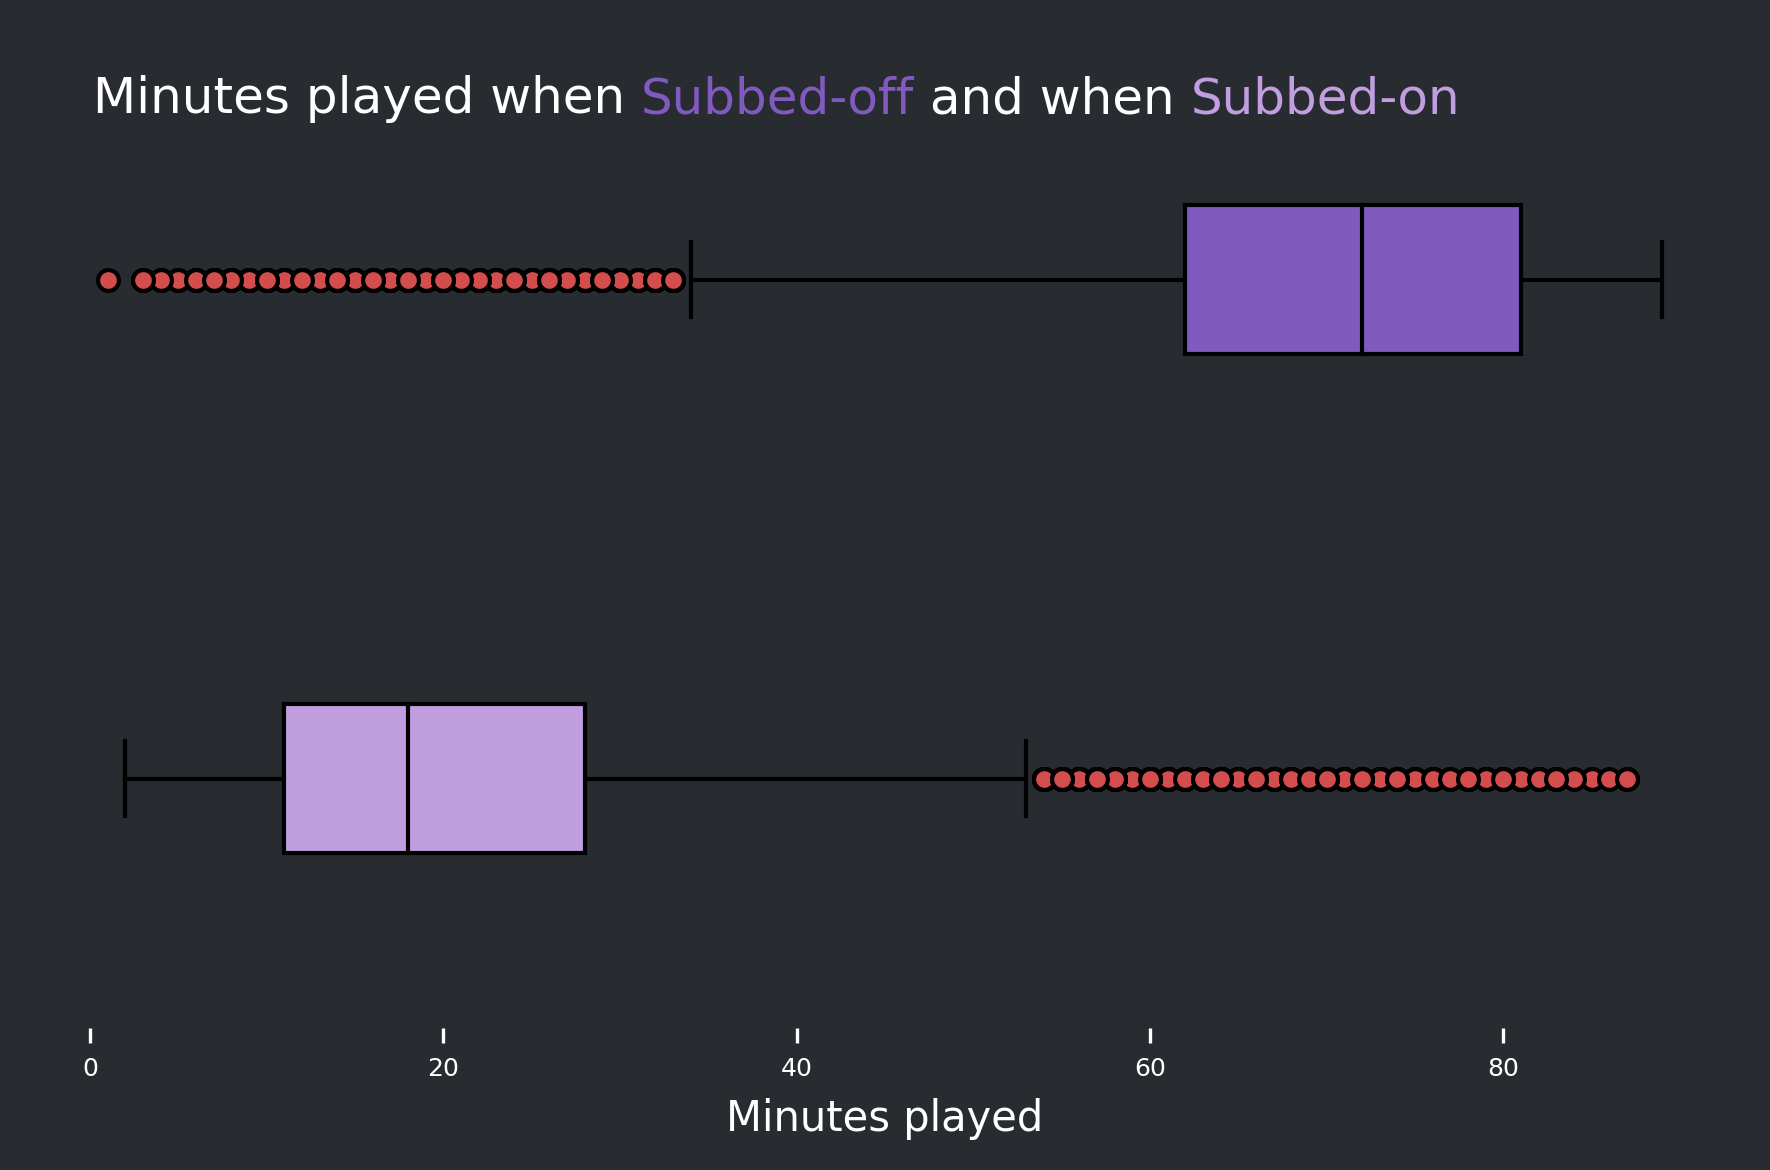

In [6]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

contour_color = 'black'
box = ax.boxplot(
    [
        df.loc[(df.Benched == 1) & (df.Min > 1)].Min,
        df.loc[(df.Benched == 0) & (df.Min < 90)].Min
        ],
    vert=False,
    patch_artist=True,
    capprops=dict(color=contour_color),
    boxprops=dict(color=contour_color),
    whiskerprops=dict(color=contour_color),
    flierprops=dict(marker='o', markerfacecolor='#D44D4D', markersize=5),
    medianprops=dict(color=contour_color),
    widths=.3)

for patch, color in zip(box['boxes'], ['#c19ee0', '#815ac0']):
    patch.set_facecolor(color)

fig_text(
    x=0.06, y=0.925,
    s="Minutes played when <Subbed-off> and when <Subbed-on>",
    highlight_textprops=[
        {"color": '#815ac0'},
        {"color": '#c19ee0'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

plt.xlabel('Minutes played', color='w')
ax.set_yticks([])
plt.box(on=None)

plt.show()